### Задание 1: Завершаем практическое задание №2. Необходимо для каждой распознанной фамилии вывести на экран наиболее подходящий вариант из стартового протокола

In [1]:
import Levenshtein

In [2]:
#стартовый протокол:

start_list = [
    'Шехавцова Анна',
    'Гречихина Наталья',
    'Козлова Алена',
    'Груздева Алина',
    'Кущенко Анна',
    'Чистякова Анастасия'
]

In [3]:
# результат расшифровки речи диктора:

speech_recognition = [
    'кучменко она',
    'кущенко оксана',
    'груздь алина',
    'рычихина наталья',
    'шиховцева на',
    'чистова анастасия'
]

In [4]:
#применим расстояние Левенштейна и выведем самые близкие фамилии и имена к распознанной речи:
for recognized_name in speech_recognition:
    distances = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in start_list}
    print(recognized_name, sorted(distances.items(), key = lambda x: x[1])[0])

кучменко она ('Кущенко Анна', 5)
кущенко оксана ('Кущенко Анна', 5)
груздь алина ('Груздева Алина', 5)
рычихина наталья ('Гречихина Наталья', 3)
шиховцева на ('Шехавцова Анна', 6)
чистова анастасия ('Чистякова Анастасия', 4)


**Посмотрим на другие метрики близости (ratio и Jaro)**

In [5]:
#применим Levenshtein.ratio:
for recognized_name in speech_recognition:
    distances2 = {real_name: round(Levenshtein.ratio(recognized_name, real_name),2) for real_name in start_list}
    print(recognized_name, sorted(distances2.items(), key = lambda x: -x[1])[0])

кучменко она ('Кущенко Анна', 0.67)
кущенко оксана ('Кущенко Анна', 0.69)
груздь алина ('Груздева Алина', 0.69)
рычихина наталья ('Гречихина Наталья', 0.85)
шиховцева на ('Шехавцова Анна', 0.62)
чистова анастасия ('Чистякова Анастасия', 0.83)


In [6]:
#применим алгоритм Жаро-Винклера:
for recognized_name in speech_recognition:
    distances3 = {real_name: round(Levenshtein.jaro(recognized_name, real_name),2) for real_name in start_list}
    print(recognized_name, sorted(distances3.items(), key = lambda x: -x[1])[0])

кучменко она ('Кущенко Анна', 0.69)
кущенко оксана ('Кущенко Анна', 0.67)
груздь алина ('Груздева Алина', 0.82)
рычихина наталья ('Гречихина Наталья', 0.9)
шиховцева на ('Шехавцова Анна', 0.68)
чистова анастасия ('Чистякова Анастасия', 0.84)


Как видно, для данной задачи, все три способа сработали одинаково. Также список можно вывести без метрик, например:

In [7]:
for recognized_name in speech_recognition:
    distances = {real_name: Levenshtein.distance(recognized_name, real_name) for real_name in start_list}
    print(recognized_name, '~', sorted(distances.items(), key = lambda x: x[1])[0][0])

кучменко она ~ Кущенко Анна
кущенко оксана ~ Кущенко Анна
груздь алина ~ Груздева Алина
рычихина наталья ~ Гречихина Наталья
шиховцева на ~ Шехавцова Анна
чистова анастасия ~ Чистякова Анастасия


### Задание 2: Постройте модель kNN для распознавания цифр. Посчитайте получившееся значение точности (последняя строка в файле 7. kNN digits.ipynb)

In [8]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [9]:
digits = datasets.load_digits()

In [10]:
# пример первой цифры в виде массива значений оттенков:
digits['data'][0].reshape(8, 8)

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

<Figure size 432x288 with 0 Axes>

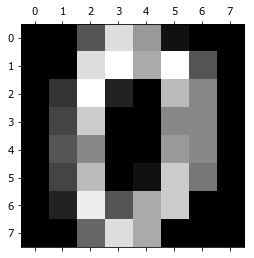

In [11]:
#нарисуем цирфу, раскрасив каждую ячейку в свой оттенок:
plt.gray()
plt.matshow(digits.images[0])
plt.show() 

In [12]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [13]:
# признаки и целевая переменная
X_digits = digits.data
Y_digits = digits.target

In [14]:
#Разобьем данные на обучающую выборку и тест в пропорции 90 / 10
split = int( len( X_digits ) * .9 )
split

1617

In [15]:
X_train = X_digits[:split]
Y_train = Y_digits[:split]

In [16]:
X_test = X_digits[split:]
Y_test = Y_digits[split:]

In [17]:
from sklearn.neighbors import KNeighborsRegressor

In [18]:
knn = KNeighborsRegressor( n_neighbors = 4, n_jobs= -1, p=2)

In [19]:
knn.fit(X_train,Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=-1, n_neighbors=4, p=2,
          weights='uniform')

In [20]:
knn.score( X_test, Y_test )

0.9303104235880398

Если изменить размер у train и test на 93% и 7%, качество предсказаний резко увеличится на 4% - до 97-98%.

При обнулении двух самых светлых оттенков получим прирост точности на 1%:

In [21]:
import numpy as np
np.putmask(digits.data, digits.data == 1, 0)
np.putmask(digits.data, digits.data == 2, 0)
X_digits = digits.data
Y_digits = digits.target
split = int( len( X_digits ) * .9 )
X_train = X_digits[:split]
Y_train = Y_digits[:split]
X_test = X_digits[split:]
Y_test = Y_digits[split:]
knn.fit(X_train,Y_train)
knn.score( X_test, Y_test )

0.941125069213732